In [78]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
# import filter_csv
# closures = ["closure_1301160.csv", "closure_1150128.csv", "closure_1240112.csv", "closure_1301113.csv", "closure_1320199.csv", "closure_1420113.csv", "closure_1420121.csv", "closure_1420125.csv"]
# merged_closures = filter_csv.process_multiple_files(closures)

In [80]:
frequency_df = pd.read_csv('totalFrequency.csv')
merged_closures = pd.read_csv('merged_closures.csv')
candidate_stops = merged_closures['StopId'].unique()
merged_closures

,StopId,StartTime,OriginalTime,ClosureTime
0,1301160,531,45,45
1,1301160,401,46,46
2,1301160,723,49,49
3,1301160,802,41,41
4,1301160,680,42,42
...,...,...,...,...
195,1420125,435,34,35
196,1420125,585,32,32
197,1420125,1141,33,34
198,1420125,648,29,30


In [81]:
summary_df = pd.DataFrame({
    'stopId': candidate_stops,
    'frequency': [frequency_df[frequency_df['Key'] == stop_id]['Count'].values[0] if not frequency_df[
        frequency_df['Key'] == stop_id].empty else 0 for stop_id in candidate_stops],
    'avg_diff': [merged_closures[merged_closures['StopId'] == stop_id]['ClosureTime'].mean() -
                 merged_closures[merged_closures['StopId'] == stop_id]['OriginalTime'].mean() if not merged_closures[
        merged_closures['StopId'] == stop_id].empty else 0 for stop_id in candidate_stops]
})
summary_df = summary_df.sort_values(by='frequency', ascending=False)
summary_df.to_csv('summary.csv', index=False)

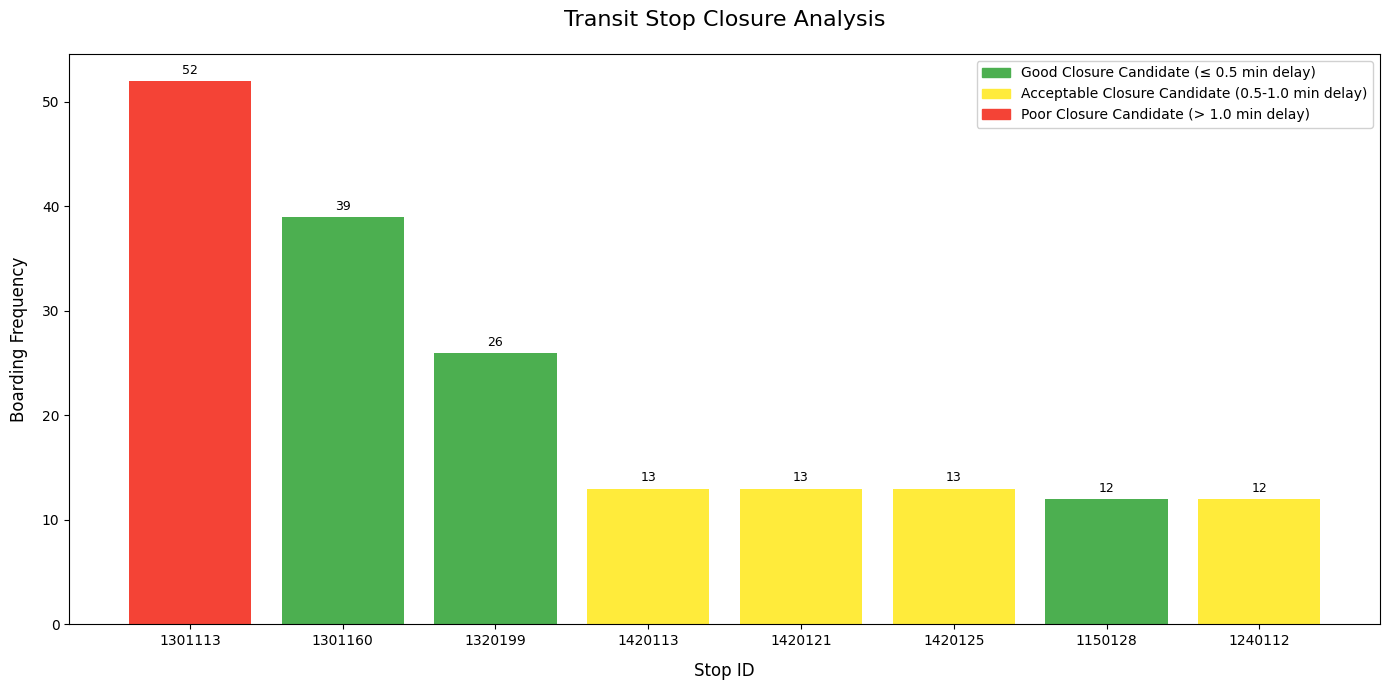

In [82]:
def assign_score(diff):
    if diff <= 0.5:
        return 'green'
    elif diff <= 1.0:
        return 'yellow'
    else:
        return 'red'


summary_df['score'] = summary_df['avg_diff'].apply(assign_score)

plt.figure(figsize=(14, 7))
ax = plt.gca()

color_map = {'green': '#4CAF50', 'yellow': '#FFEB3B', 'red': '#F44336'}

bars = ax.bar(summary_df['stopId'].astype(str),
              summary_df['frequency'],
              color=[color_map[score] for score in summary_df['score']])

plt.title('Transit Stop Closure Analysis', fontsize=16, pad=20)
plt.xlabel('Stop ID', fontsize=12, labelpad=10)
plt.ylabel('Boarding Frequency', fontsize=12, labelpad=10)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=9)

legend = [
    mpatches.Patch(color=color_map['green'], label='Good Closure Candidate (≤ 0.5 min delay)'),
    mpatches.Patch(color=color_map['yellow'], label='Acceptable Closure Candidate (0.5-1.0 min delay)'),
    mpatches.Patch(color=color_map['red'], label='Poor Closure Candidate (> 1.0 min delay)')
]
plt.legend(handles=legend, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.savefig('closure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

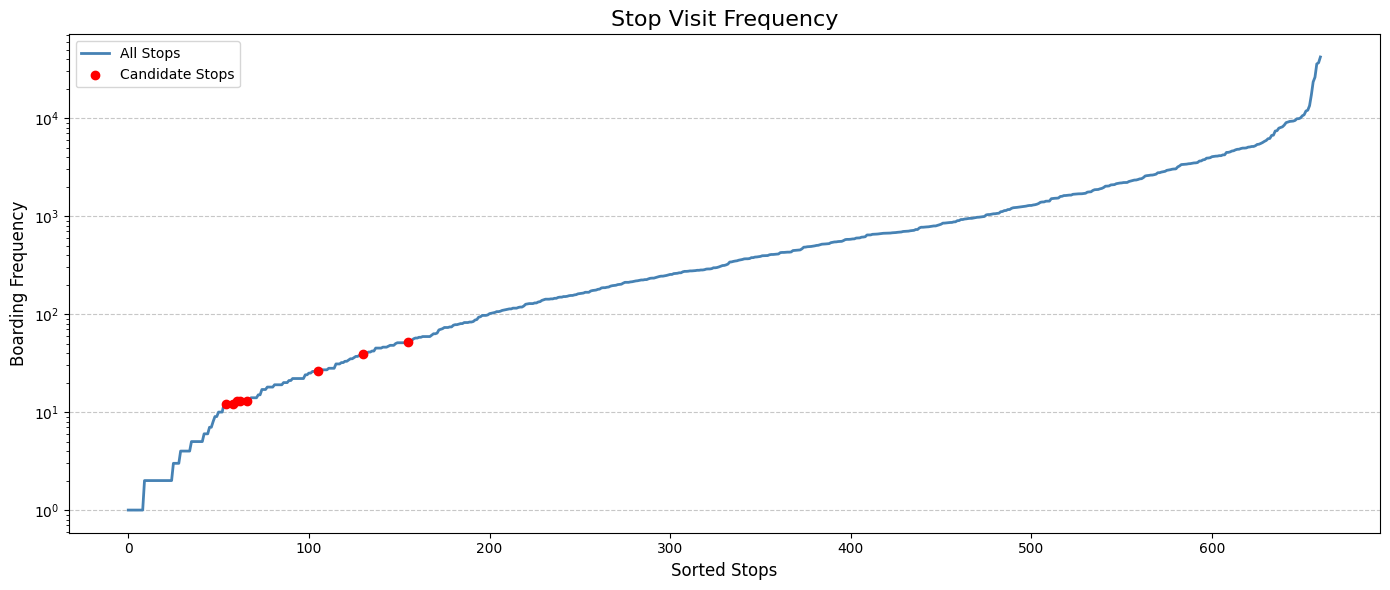

In [84]:
df = frequency_df.sort_values('Count').reset_index(drop=True)
df['SortedIndex'] = df.index
candidate_df = df[df['Key'].isin(candidate_stops)]

plt.figure(figsize=(14, 6))
plt.plot(df['SortedIndex'], df['Count'], label='All Stops', color='steelblue', linewidth=2)

plt.scatter(candidate_df['SortedIndex'], candidate_df['Count'], color='red', label='Candidate Stops', zorder=6)

plt.yscale('log')

plt.title('Stop Visit Frequency', fontsize=16)
plt.xlabel('Sorted Stops', fontsize=12)
plt.ylabel('Boarding Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('stop_frequency.png', dpi=300, bbox_inches='tight')
plt.show()